In [1]:
import os
%matplotlib inline
import networkx as nx
import networkx.generators.small
import urllib
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (10, 6)
from networkx import algorithms

In [2]:
os.getcwd()

'/Users/tjd/Dropbox/CUNY/IS620'

In [3]:
## read in the Reuters 9/11 news dataset from Pajek format
## source: http://vlado.fmf.uni-lj.si/pub/networks/data/CRA/terror.htm
days = nx.read_pajek('days.net')

In [4]:
len(days)

13332

In [6]:
deg = nx.degree(days)

In [7]:
max(deg.values())

8520

In [8]:
min(deg.values())

0

In [9]:
## get a sorted degree list to obtain top words
def sorted_map( map):
    ms = sorted(map.iteritems(), key = lambda (k, v): (-v, k))
    return ms


In [11]:
ds = sorted_map(deg)

In [12]:
ds[0:9]

[(u'united_states', 8520),
 (u'attack', 4933),
 (u'taliban', 3884),
 (u'afghanistan', 3310),
 (u'people', 3301),
 (u'pres_bush', 3040),
 (u'bin_laden', 2756),
 (u'washington', 2475),
 (u'official', 2464)]

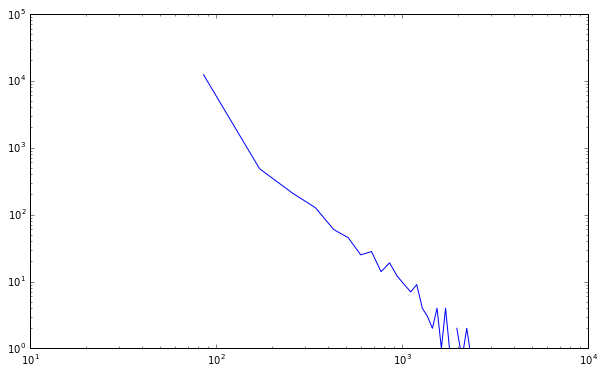

In [15]:
## log-log histogram of degree values
h = plt.loglog(h[1][1:], h[0])

In [19]:
## get rid of pendant and isolated nodes, using function

def trim_degrees( g, degree = 1):
    g2 = g.copy()
    d = nx.degree( g2)
    for n in g2. nodes():
        if d[ n] <= degree: g2. remove_node( n)
    return g2

In [20]:
core = trim_degrees(days)

In [21]:
len(core)

12729

In [23]:
## trim it further to get something we can draw
core2 = trim_degrees(days, degree=2)

In [24]:
len(core2)

9945

In [26]:
core4 = trim_degrees(days, degree=4)

In [27]:
len(core4)

7336

In [28]:
core8 = trim_degrees(days, degree=8)

In [29]:
len(core8)

5066

In [30]:
core10 = trim_degrees(days, degree=10)

In [31]:
len(core10)

4458

In [46]:
core1000 = trim_degrees(days, degree=1000)

In [47]:
len(core1000)

55

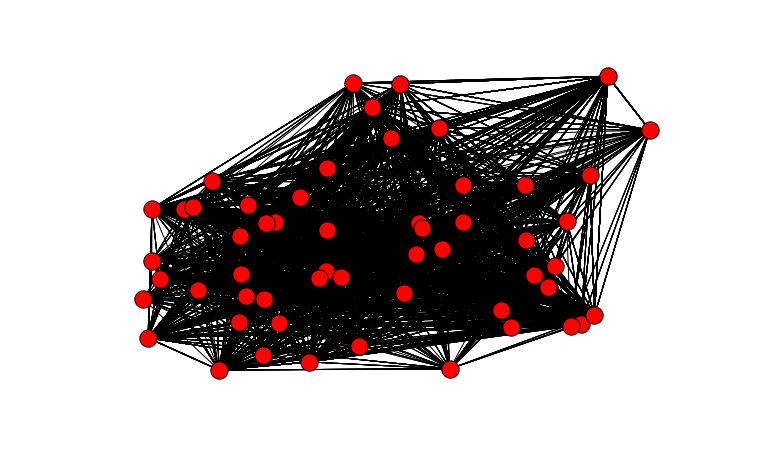

In [51]:
nx.draw_random(core1000)

In [55]:
nx.diameter(core1000)

2

In [57]:
nx.center(core1000)

[u'united_states', u'washington', u'american']

In [58]:
nx.eccentricity(core1000)

{u'afghan': 2,
 u'afghanistan': 2,
 u'air': 2,
 u'airport': 2,
 u'american': 1,
 u'anthrax': 2,
 u'attack': 2,
 u'bin_laden': 2,
 u'bomb': 2,
 u'city': 2,
 u'country': 2,
 u'day': 2,
 u'force': 2,
 u'foreign': 2,
 u'friday': 2,
 u'government': 2,
 u'group': 2,
 u'islamic': 2,
 u'kabul': 2,
 u'leader': 2,
 u'military': 2,
 u'minister': 2,
 u'muslim': 2,
 u'nation': 2,
 u'new': 2,
 u'new_york': 2,
 u'office': 2,
 u'official': 2,
 u'pakistan': 2,
 u'pentagon': 2,
 u'people': 2,
 u'plane': 2,
 u'police': 2,
 u'pres_bush': 2,
 u'president': 2,
 u'report': 2,
 u'security': 2,
 u'spokesman': 2,
 u'state': 2,
 u'strike': 2,
 u'support': 2,
 u'taliban': 2,
 u'tell': 2,
 u'terrorism': 2,
 u'terrorist': 2,
 u'time': 2,
 u'tuesday': 2,
 u'united_states': 1,
 u'war': 2,
 u'washington': 1,
 u'wednesday': 2,
 u'week': 2,
 u'worker': 2,
 u'world': 2,
 u'world_trade_ctr': 2}

In [69]:
nx.periphery(core1000)[0:19]

[u'pakistan',
 u'bomb',
 u'office',
 u'people',
 u'tuesday',
 u'group',
 u'report',
 u'president',
 u'force',
 u'foreign',
 u'pentagon',
 u'city',
 u'terrorist',
 u'police',
 u'leader',
 u'afghanistan',
 u'support',
 u'state',
 u'spokesman']

In [60]:
nx.radius(core1000)

1

In [61]:
nx.number_connected_components(core1000)

1

In [64]:
core_deg = nx.degree(core1000)

In [67]:
cd = sorted_map(core_deg)

In [68]:
cd[0:9]

[(u'united_states', 1461),
 (u'attack', 1070),
 (u'taliban', 877),
 (u'afghanistan', 762),
 (u'people', 700),
 (u'washington', 664),
 (u'pres_bush', 631),
 (u'bin_laden', 566),
 (u'official', 555)]